# matrix

样本总数:  10000000.0


<IPython.core.display.Javascript object>


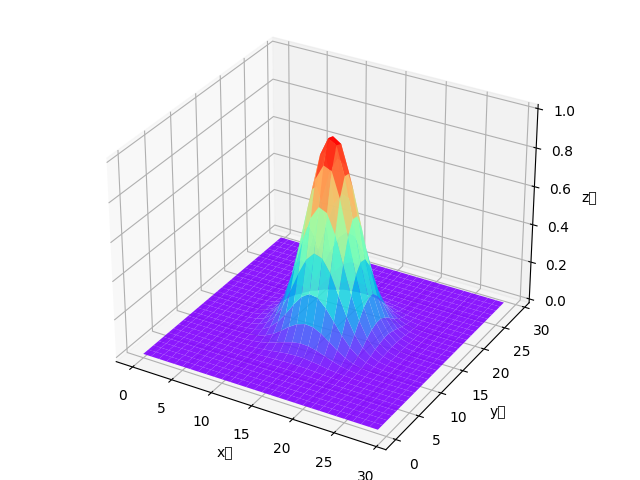

/home/intellif/anaconda3/envs/object_tracking/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
/home/intellif/anaconda3/envs/object_tracking/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

if __name__ == '__main__':
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    d = np.random.randn(10000000, 2)
    N = 30
    density, edges = np.histogramdd(d, bins=[30, 30])
    print("样本总数: ", np.sum(density))
    density = density/density.max()
    x = y = np.arange(N)
    t = np.meshgrid(x,y)
    fig = plt.figure()
    ax = Axes3D(fig)
#     ax.scatter(t[0], t[1], density, c='r', s=15*density, marker='o', depthshade=True)
    ax.plot_surface(t[0], t[1], density, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
    ax.set_xlabel("x轴")
    ax.set_ylabel("y轴")
    ax.set_zlabel("z轴")
    plt.title("二元高斯分布")
    plt.tight_layout(0.1)
    plt.show()

<IPython.core.display.Javascript object>


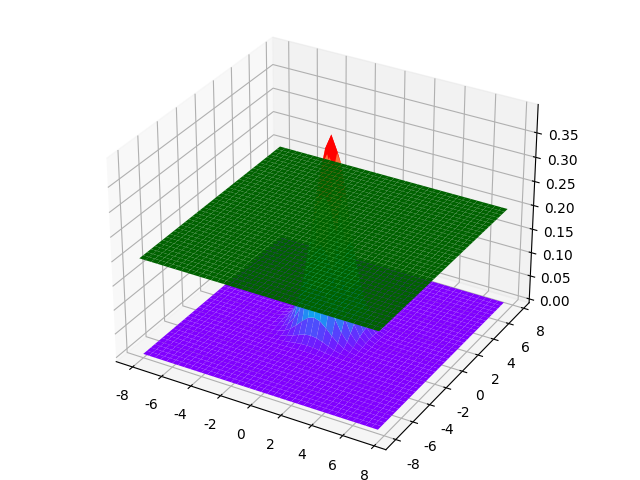

mean=0  std=1


In [87]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = Axes3D(fig)
len = 8;
step = 0.4;
 
 
def build_layer(z_value):
 x = np.arange(-len, len, step);
 y = np.arange(-len, len, step);
 z1 = np.full(x.size, z_value/2)
 z2 = np.full(x.size, z_value/2)
 z1, z2 = np.meshgrid(z1, z2)
 z = z1 + z2;
 
 x, y = np.meshgrid(x, y)
 return (x, y, z);
 
def build_gaussian_layer(mean, standard_deviation):
 x = np.arange(-len, len, step);
 y = np.arange(-len, len, step);
 x, y = np.meshgrid(x, y);
 print(f'mean={mean}  std={standard_deviation}')
 z = np.exp(-((y-mean)**2 + (x - mean)**2)/(2*(standard_deviation**2)))
 z = z/(np.sqrt(2*np.pi)*standard_deviation);
 return (x, y, z);
 
# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
x1, y1, z1 = build_layer(0.2);
ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, color='green')
 
# x5, y5, z5 = build_layer(0.15);
# ax.plot_surface(x5, y5, z5, rstride=1, cstride=1, color='pink')
 
# x2, y2, z2 = build_layer(-0.26);
# ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, color='yellow')
#
# x6, y6, z6 = build_layer(-0.22);
# ax.plot_surface(x6, y6, z6, rstride=1, cstride=1, color='pink')
 
# x4, y4, z4 = build_layer(0);
# ax.plot_surface(x4, y4, z4, rstride=1, cstride=1, color='purple')
 
x3, y3, z3 = build_gaussian_layer(0, 1)
ax.plot_surface(x3, y3, z3, rstride=1, cstride=1, cmap='rainbow')
plt.show()
 
 
# #这是第三张图片的代码
 
# import numpy as np
# import matplotlib.pyplot as plt
# import mpl_toolkits.mplot3d
 
# x, y = np.mgrid[-1:1:20j, -1:1:20j]
# z = x * np.exp(-x ** 2 - y ** 2)
 
# ax = plt.subplot(111, projection='3d')
# ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap=plt.cm.coolwarm, alpha=0.8)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
 
# plt.show()

In [88]:
def func(x, y, means, stds, rho):
    X, Y = np.meshgrid(x, y)
    means_x, means_y = means[0], means[1]
    std_x, std_y = stds[0], stds[1]
    a = 2*np.pi*std_x*std_y*np.sqrt(1-rho*rho)
    b1 = -1/(2*(1-rho*rho))
#     b2 = ((x-means_x)*(x-means_x))/(std_x*std_x)
#     b3 = 2*rho*(((x-means_x)*(y-means_y))/(std_x*std_y))
#     b4 = ((y-means_y)*(y-means_y))/(std_y*std_y)
    b2 = ((X-means_x)*(X-means_x))/(std_x*std_x)
    b3 = 2*rho*(((X-means_x)*(Y-means_y))/(std_x*std_y))
    b4 = ((Y-means_y)*(Y-means_y))/(std_y*std_y)
    b = np.exp(  b1 * (b2-b3+b4)  )
    Z = a * b
    return X, Y, Z

In [89]:
len = 8
step = 0.4

delta_x, delta_y = 0, 0
x = np.arange(-len, len, step) + delta_x
y = np.arange(-len, len, step) + delta_y
means = (x.mean(), y.mean())
# means = (0, 0)
stds = (1, 1)
rho = 0
X, Y, Z = func(x, y, means, stds, rho)
print(f'X: {X.shape}  {X.min()}  {X.max()}\nY: {Y.shape}  {Y.min()}  {Y.max()}\nZ: {Z.shape}  {Z.min()}  {Z.max()}')

delta_x, delta_y = 0, 5
x = np.arange(-len, len, step) + delta_x
y = np.arange(-len, len, step) + delta_y
means = (x.mean(), y.mean())
# means = (0, 0)
stds = (1, 1)
rho = 0
X, Y, Z = func(x, y, means, stds, rho)
print(f'X: {X.shape}  {X.min()}  {X.max()}\nY: {Y.shape}  {Y.min()}  {Y.max()}\nZ: {Z.shape}  {Z.min()}  {Z.max()}')

X: (40, 40)  -8.0  7.600000000000014
Y: (40, 40)  -8.0  7.600000000000014
Z: (40, 40)  2.3752186211350995e-26  6.036818087375192
X: (40, 40)  -8.0  7.600000000000014
Y: (40, 40)  -3.0  12.600000000000014
Z: (40, 40)  2.3752186211350995e-26  6.036818087375192


<IPython.core.display.Javascript object>


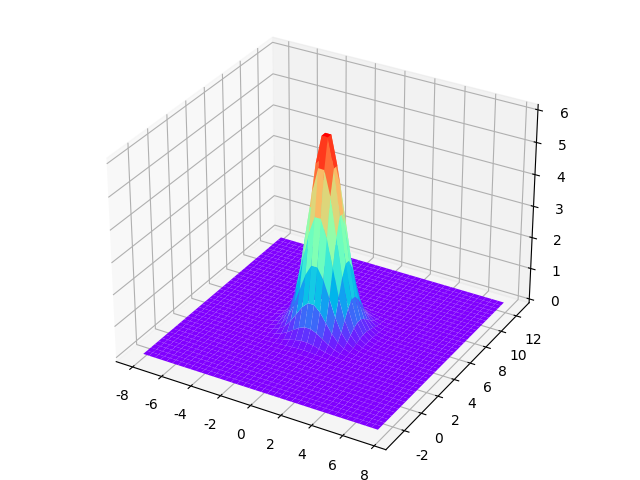

In [90]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

<IPython.core.display.Javascript object>


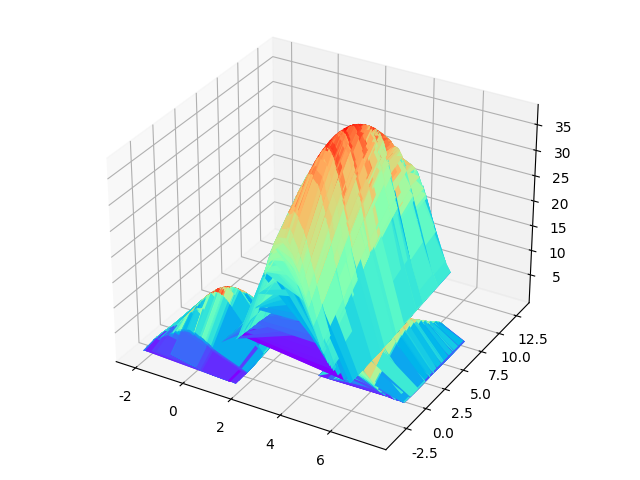




xy: (100, 2)  means: (2,)  stds: (2,)
X: (100, 100)  Y: (100, 100)
[func]  Z: (100, 100)  0.005615516926116089  10.882267926504326  ==>  5.894929112225973  3.127943740932072
X: (100, 100) -2.1235298355622456  1.766888049887918  ==>  -0.1742644041848343  0.8957208687685947
Y: (100, 100)  -3.856445824347024  3.523442112058728    ==>  -0.1578927281391966  1.3862022347045104
Z: (100, 100)  0.005615516926116089  10.882267926504326    ==>  5.894929112225973  3.127943740932072



xy: (100, 2)  means: (2,)  stds: (2,)
X: (100, 100)  Y: (100, 100)
[func]  Z: (100, 100)  0.004671430390684708  38.08915549549633  ==>  22.999922990196467  11.813223299933734
X: (100, 100) -0.058169394064018665  5.243912985067046  ==>  2.8747715725054865  1.042951403068474
Y: (100, 100)  -0.3361939245845402  13.13618443755648    ==>  5.711197422689808  2.7438547061479928
Z: (100, 100)  0.004671430390684708  38.08915549549633    ==>  22.999922990196467  11.813223299933734



xy: (100, 2)  means: (2,)  stds: (2,)
X:

In [92]:
import numpy as np;
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


fig = plt.figure()
ax = Axes3D(fig)

def func(means, stds, X, Y):
    means_x, means_y = means[0], means[1]
    std_x, std_y = stds[0], stds[1]
    a = 2*np.pi*std_x*std_y*np.sqrt(1-rho*rho)
    b1 = -1/(2*(1-rho*rho))
    b2 = ((X-means_x)*(X-means_x))/(std_x*std_x)
    b3 = 2*rho*(((X-means_x)*(Y-means_y))/(std_x*std_y))
    b4 = ((Y-means_y)*(Y-means_y))/(std_y*std_y)
    b = np.exp(b1 * (b2-b3+b4))
    Z = a * b
    print(f'[func]  Z: {Z.shape}  {Z.min()}  {Z.max()}  ==>  {Z.mean()}  {Z.std()}')
    return Z


MEANS = np.array([[0, 0], [3, 6], [6, 3], [6, 6]])
# STDS = np.array([[1, 1], [0.5, 0.5], [5, 5]])
# STDS = np.array([[1, 1], [1, 1], [1, 1], [1, 1]])
STDS = np.array([[1, 2], [1, 2], [1, 2], [1, 2]])
rho = 0.7

MEANS = np.array([[0, 0], [3, 6], [6, 3]])
# STDS = np.array([[1, 1], [0.5, 0.5], [5, 5]])
# STDS = np.array([[1, 1], [1, 1], [1, 1]])
# STDS = np.array([[1, 5], [1, 5], [1, 5]])
STDS = np.array([[1, 2], [1, 7], [0.5, 3]])
rho = 0.5

for i, (mean, std) in enumerate(zip(MEANS, STDS)):
    
    cov = np.array([[std[0], rho], [rho, std[1]]])
    xy = np.random.multivariate_normal(mean, cov, shape, 'raise')
    
    print(f'\n\n')
#     means = xy.mean(axis=1)
#     stds = xy.std(axis=1)
    means = mean  # xy.mean(axis=1)
    stds = std  # xy.std(axis=1)
    print(f'xy: {xy.shape}  means: {means.shape}  stds: {stds.shape}')


    X, Y = np.meshgrid(xy[:, 0], xy[:, 1])
    print(f'X: {X.shape}  Y: {Y.shape}')

    Z = func(means, stds, X, Y)
    print(f'X: {X.shape} {X.min()}  {X.max()}  ==>  {X.mean()}  {X.std()}\nY: {Y.shape}  {Y.min()}  {Y.max()}    ==>  {Y.mean()}  {Y.std()}\nZ: {Z.shape}  {Z.min()}  {Z.max()}    ==>  {Z.mean()}  {Z.std()}')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()